In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

cf.go_offline()

%matplotlib inline

In [2]:
!pip install cufflinks

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [4]:
from nixtla import NixtlaClient

In [5]:
nixtla_client = NixtlaClient(api_key="nixak-sVs734PNn3JEOMYhbwrfTAW5C9Y1Jqu3jDBlBW38DgOxX8tLmcZSmX4InxwXiiEFXllPOCcGmdKEYSZW")

In [6]:
nixtla_client.validate_api_key()

INFO:nixtla.nixtla_client:Happy Forecasting! :)


True

In [7]:
updated_df = pd.read_csv("https://raw.githubusercontent.com/cdcepi/FluSight-forecast-hub/refs/heads/main/target-data/target-hospital-admissions.csv")

In [8]:
updated_df = updated_df[updated_df["location_name"] == "US"]
updated_df = updated_df[["date", "value"]]
updated_df["date"] = pd.to_datetime(updated_df["date"])
updated_df.set_index("date", inplace = True)
updated_df.sort_values(by = "date", inplace = True)
updated_df

,value
date,
2022-02-05,1092.0
2022-02-12,1164.0
2022-02-19,1493.0
2022-02-26,1603.0
2022-03-05,1791.0
...,...
2025-01-18,32561.0
2025-01-25,39927.0
2025-02-01,50272.0


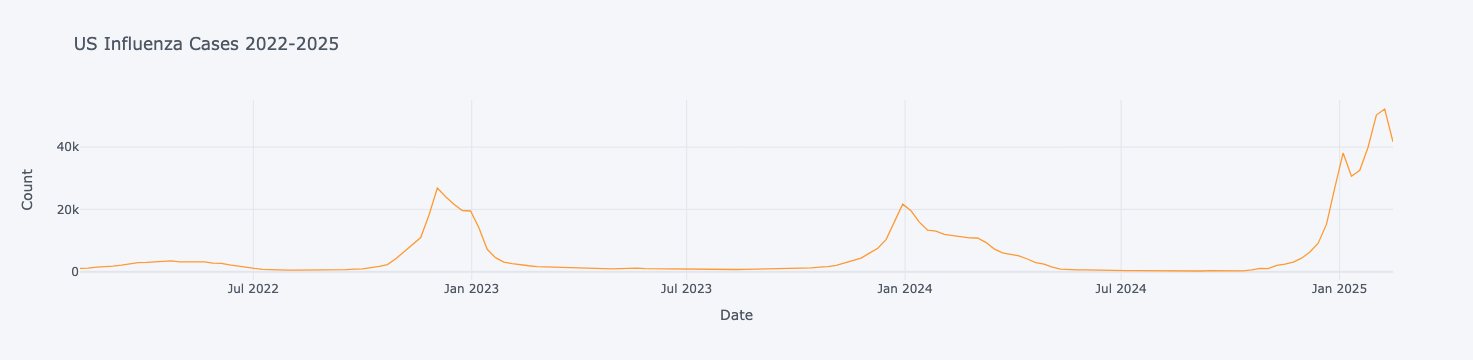

In [9]:
updated_df.iplot(xTitle = "Date", yTitle = "Count", title = "US Influenza Cases 2022-2025")

In [10]:
oct1stweekdf = updated_df.loc[:"2024-10-05"]
oct3rdweekdf = updated_df.loc[:"2024-10-19"]
nov1stweekdf = updated_df.loc[:"2024-11-02"]
nov3rdweekdf = updated_df.loc[:"2024-11-16"]
dec1stweekdf = updated_df.loc[:"2024-12-07"]

In [11]:
#TimeGPT Predictions

In [12]:
GPT_oct1stweekfc = nixtla_client.forecast(df = oct1stweekdf, time_col=oct1stweekdf.index.name, target_col="value", h=4)
GPT_oct1stweekfc.set_index("date", inplace=True)

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: W-SAT
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Querying model metadata...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


In [13]:
GPT_oct3rdweekfc = nixtla_client.forecast(df = oct3rdweekdf, time_col="date", target_col="value", h=4)
GPT_oct3rdweekfc.set_index("date", inplace=True)

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: W-SAT
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


In [14]:
GPT_nov1stweekfc = nixtla_client.forecast(df = nov1stweekdf, time_col="date", target_col="value", h=4)
GPT_nov1stweekfc.set_index("date", inplace=True)

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: W-SAT
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


In [15]:
GPT_nov3rdweekfc = nixtla_client.forecast(df = nov3rdweekdf, time_col="date", target_col="value", h=4)
GPT_nov3rdweekfc.set_index("date", inplace=True)

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: W-SAT
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


In [16]:
GPT_dec1stweekfc = nixtla_client.forecast(df = dec1stweekdf, time_col="date", target_col="value", h=4)
GPT_dec1stweekfc.set_index("date", inplace=True)

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: W-SAT
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


In [17]:
plottingdf = pd.DataFrame()
plottingdf.index = updated_df.index
plottingdf["Real Data"] = updated_df["value"]
plottingdf["Oct 1st Week Model"] = GPT_oct1stweekfc["TimeGPT"]
plottingdf["Oct 3rd Week Model"] = GPT_oct3rdweekfc["TimeGPT"]
plottingdf["Nov 1st Week Model"] = GPT_nov1stweekfc["TimeGPT"]
plottingdf["Nov 3rd Week Model"] = GPT_nov3rdweekfc["TimeGPT"]
plottingdf["Dec 1st Week Model"] = GPT_dec1stweekfc["TimeGPT"]
plottingdf

,Real Data,Oct 1st Week Model,Oct 3rd Week Model,Nov 1st Week Model,Nov 3rd Week Model,Dec 1st Week Model
date,,,,,,
2022-02-05,1092.0,NaN,NaN,NaN,NaN,NaN
2022-02-12,1164.0,NaN,NaN,NaN,NaN,NaN
2022-02-19,1493.0,NaN,NaN,NaN,NaN,NaN
2022-02-26,1603.0,NaN,NaN,NaN,NaN,NaN
2022-03-05,1791.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2025-01-18,32561.0,NaN,NaN,NaN,NaN,NaN
2025-01-25,39927.0,NaN,NaN,NaN,NaN,NaN
2025-02-01,50272.0,NaN,NaN,NaN,NaN,NaN


In [18]:
plottingdf.iloc[-18:-4]

,Real Data,Oct 1st Week Model,Oct 3rd Week Model,Nov 1st Week Model,Nov 3rd Week Model,Dec 1st Week Model
date,,,,,,
2024-10-19,553.0,389.91937,NaN,NaN,NaN,NaN
2024-10-26,1082.0,765.02940,559.8797,NaN,NaN,NaN
2024-11-02,976.0,1100.21060,1000.2830,NaN,NaN,NaN
2024-11-09,2032.0,NaN,1557.2850,1702.5033,NaN,NaN
2024-11-16,2439.0,NaN,2076.5708,2445.9739,NaN,NaN
2024-11-23,3090.0,NaN,NaN,3267.4758,3436.5830,NaN
2024-11-30,4347.0,NaN,NaN,4334.8830,4625.2544,NaN
2024-12-07,6353.0,NaN,NaN,NaN,5917.3613,NaN
2024-12-14,9140.0,NaN,NaN,NaN,7758.4300,9226.8460


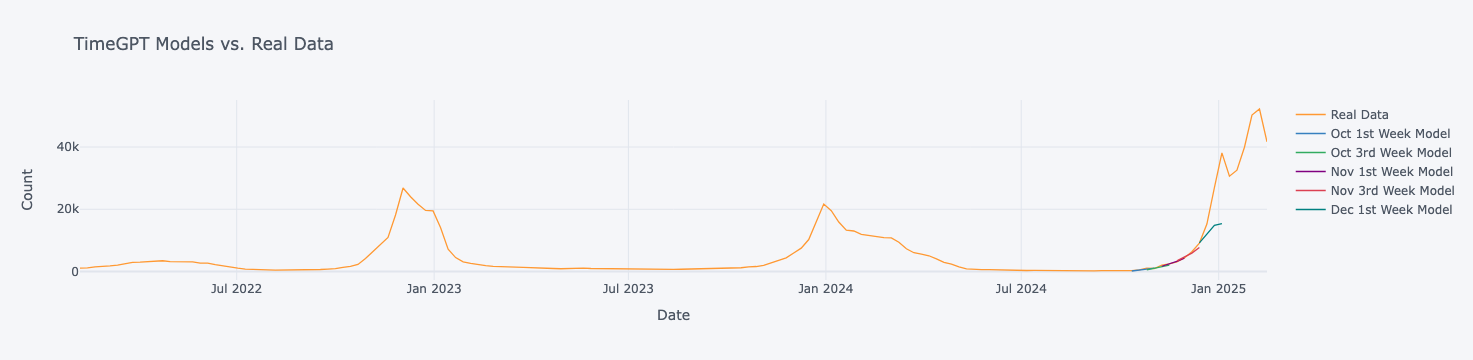

In [19]:
plottingdf.iplot(xTitle = "Date", yTitle = "Count", title = "TimeGPT Models vs. Real Data")

In [20]:
GPT_dec1stweekfc

,TimeGPT
date,
2024-12-14,9226.8460
2024-12-21,12139.1875
2024-12-28,14839.2270
2025-01-04,15416.7690


In [21]:
#Metrics MAE
print(mean_absolute_error(updated_df["value"].loc["2024-10-12":"2024-11-02"], GPT_oct1stweekfc["TimeGPT"]))
print(mean_absolute_error(updated_df["value"].loc["2024-10-26":"2024-11-16"], GPT_oct3rdweekfc["TimeGPT"]))
print(mean_absolute_error(updated_df["value"].loc["2024-11-09":"2024-11-30"], GPT_nov1stweekfc["TimeGPT"]))
print(mean_absolute_error(updated_df["value"].loc["2024-11-23":"2024-12-14"], GPT_nov3rdweekfc["TimeGPT"])) 
print(mean_absolute_error(updated_df["value"].loc["2024-12-14":"2025-01-04"], GPT_dec1stweekfc["TimeGPT"]))

180.66617750000003
345.88687500000003
131.51585000000006
610.511525
9509.665625


In [22]:
#Metrics MSE
print(mean_squared_error(updated_df["value"].loc["2024-10-12":"2024-11-02"], GPT_oct1stweekfc["TimeGPT"]))
print(mean_squared_error(updated_df["value"].loc["2024-10-26":"2024-11-16"], GPT_oct3rdweekfc["TimeGPT"]))
print(mean_squared_error(updated_df["value"].loc["2024-11-09":"2024-11-30"], GPT_nov1stweekfc["TimeGPT"]))
print(mean_squared_error(updated_df["value"].loc["2024-11-23":"2024-12-14"], GPT_nov3rdweekfc["TimeGPT"])) 
print(mean_squared_error(updated_df["value"].loc["2024-12-14":"2025-01-04"], GPT_dec1stweekfc["TimeGPT"]))

39128.29207255283
157477.13199968252
35065.297966685
574015.5072115124
168024314.82244056


In [23]:
#Metrics MAPE
print(mean_absolute_percentage_error(updated_df["value"].loc["2024-10-12":"2024-11-02"], GPT_oct1stweekfc["TimeGPT"]))
print(mean_absolute_percentage_error(updated_df["value"].loc["2024-10-26":"2024-11-16"], GPT_oct3rdweekfc["TimeGPT"]))
print(mean_absolute_percentage_error(updated_df["value"].loc["2024-11-09":"2024-11-30"], GPT_nov1stweekfc["TimeGPT"]))
print(mean_absolute_percentage_error(updated_df["value"].loc["2024-11-23":"2024-12-14"], GPT_nov3rdweekfc["TimeGPT"])) 
print(mean_absolute_percentage_error(updated_df["value"].loc["2024-12-14":"2025-01-04"], GPT_dec1stweekfc["TimeGPT"]))

0.2791202835472225
0.2224120691492185
0.05630904724566517
0.09897550893702077
0.3148061869915164


In [24]:
def nmse_sklearn(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) / np.var(y_true)

In [25]:
#Metrics NMSE
print(nmse_sklearn(updated_df["value"].loc["2024-10-12":"2024-11-02"], GPT_oct1stweekfc["TimeGPT"]))
print(nmse_sklearn(updated_df["value"].loc["2024-10-26":"2024-11-16"], GPT_oct3rdweekfc["TimeGPT"]))
print(nmse_sklearn(updated_df["value"].loc["2024-11-09":"2024-11-30"], GPT_nov1stweekfc["TimeGPT"]))
print(nmse_sklearn(updated_df["value"].loc["2024-11-23":"2024-12-14"], GPT_nov3rdweekfc["TimeGPT"])) 
print(nmse_sklearn(updated_df["value"].loc["2024-12-14":"2025-01-04"], GPT_dec1stweekfc["TimeGPT"]))

0.38652384587321437
0.40794945225560325
0.04565588911264403
0.10986734923164315
1.358781866012369


In [26]:
#ARIMA Modeling w/ Nixtla
#Having a problem with using index as the date column, so will add this dummy date2 column to all of the training data frames

oct1stweekdf['date2'] = oct1stweekdf.index
oct3rdweekdf["date2"] = oct3rdweekdf.index
nov1stweekdf["date2"] = nov1stweekdf.index
nov3rdweekdf["date2"] = nov3rdweekdf.index
dec1stweekdf["date2"] = dec1stweekdf.index

In [27]:
oct1stweekdf

,value,date2
date,,
2022-02-05,1092.0,2022-02-05
2022-02-12,1164.0,2022-02-12
2022-02-19,1493.0,2022-02-19
2022-02-26,1603.0,2022-02-26
2022-03-05,1791.0,2022-03-05
...,...,...
2024-09-07,223.0,2024-09-07
2024-09-14,319.0,2024-09-14
2024-09-21,293.0,2024-09-21


In [28]:
#ARIMA Predictions

In [29]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

ModuleNotFoundError: No module named 'statsforecast'

In [ ]:
sf = StatsForecast(models=[AutoARIMA(season_length=52)], freq = "W-SAT")

In [ ]:
ARIMA_oct1stweekfc = sf.forecast(df = oct1stweekdf.assign(unique_id='series_1'), time_col="date2", target_col="value", h=4)
ARIMA_oct1stweekfc.set_index("date2", inplace=True)

In [ ]:
ARIMA_dec1stweekfc

In [ ]:
ARIMA_oct3rdweekfc = sf.forecast(df = oct3rdweekdf.assign(unique_id="series-1"), time_col="date2", target_col="value", h = 4)
ARIMA_oct3rdweekfc.set_index("date2", inplace=True)

In [ ]:
ARIMA_nov1stweekfc = sf.forecast(df = nov1stweekdf.assign(unique_id="series-1"), time_col="date2", target_col="value", h = 4)
ARIMA_nov1stweekfc.set_index("date2", inplace=True)

In [ ]:
ARIMA_nov3rdweekfc = sf.forecast(df = nov3rdweekdf.assign(unique_id="series-1"), time_col="date2", target_col="value", h = 4)
ARIMA_nov3rdweekfc.set_index("date2", inplace=True)

In [ ]:
ARIMA_dec1stweekfc = sf.forecast(df = dec1stweekdf.assign(unique_id="series-1"), time_col="date2", target_col="value", h = 4)
ARIMA_dec1stweekfc.set_index("date2", inplace=True)

In [ ]:
ARIMA_dec1stweekfc

In [ ]:
ARIMA_plottingdf = pd.DataFrame()
ARIMA_plottingdf.index = updated_df.index
ARIMA_plottingdf["Real Data"] = updated_df["value"]

ARIMA_plottingdf["Oct 1st Week Model"] = ARIMA_oct1stweekfc["AutoARIMA"]
ARIMA_plottingdf["Oct 3rd Week Model"] = ARIMA_oct3rdweekfc["AutoARIMA"]
ARIMA_plottingdf["Nov 1st Week Model"] = ARIMA_nov1stweekfc["AutoARIMA"]
ARIMA_plottingdf["Nov 3rd Week Model"] = ARIMA_nov3rdweekfc["AutoARIMA"]
ARIMA_plottingdf["Dec 1st Week Model"] = ARIMA_dec1stweekfc["AutoARIMA"]
ARIMA_plottingdf

In [ ]:
ARIMA_plottingdf.iloc[-18:-4]

In [ ]:
ARIMA_plottingdf.iplot(xTitle = "Date", yTitle = "Count", title = "ARIMA Models vs. Real Data")

In [ ]:
#Metrics MAE
print(mean_absolute_error(updated_df["value"].loc["2024-10-12":"2024-11-02"], ARIMA_oct1stweekfc["AutoARIMA"]))
print(mean_absolute_error(updated_df["value"].loc["2024-10-26":"2024-11-16"], ARIMA_oct3rdweekfc["AutoARIMA"]))
print(mean_absolute_error(updated_df["value"].loc["2024-11-09":"2024-11-30"], ARIMA_nov1stweekfc["AutoARIMA"]))
print(mean_absolute_error(updated_df["value"].loc["2024-11-23":"2024-12-14"], ARIMA_nov3rdweekfc["AutoARIMA"])) 
print(mean_absolute_error(updated_df["value"].loc["2024-12-14":"2025-01-04"], ARIMA_dec1stweekfc["AutoARIMA"]))

In [ ]:
#Metrics MSE
print(mean_squared_error(updated_df["value"].loc["2024-10-12":"2024-11-02"], ARIMA_oct1stweekfc["AutoARIMA"]))
print(mean_squared_error(updated_df["value"].loc["2024-10-26":"2024-11-16"], ARIMA_oct3rdweekfc["AutoARIMA"]))
print(mean_squared_error(updated_df["value"].loc["2024-11-09":"2024-11-30"], ARIMA_nov1stweekfc["AutoARIMA"]))
print(mean_squared_error(updated_df["value"].loc["2024-11-23":"2024-12-14"], ARIMA_nov3rdweekfc["AutoARIMA"])) 
print(mean_squared_error(updated_df["value"].loc["2024-12-14":"2025-01-04"], ARIMA_dec1stweekfc["AutoARIMA"]))

In [ ]:
#Metrics MAPE
print(mean_absolute_percentage_error(updated_df["value"].loc["2024-10-12":"2024-11-02"], ARIMA_oct1stweekfc["AutoARIMA"]))
print(mean_absolute_percentage_error(updated_df["value"].loc["2024-10-26":"2024-11-16"], ARIMA_oct3rdweekfc["AutoARIMA"]))
print(mean_absolute_percentage_error(updated_df["value"].loc["2024-11-09":"2024-11-30"], ARIMA_nov1stweekfc["AutoARIMA"]))
print(mean_absolute_percentage_error(updated_df["value"].loc["2024-11-23":"2024-12-14"], ARIMA_nov3rdweekfc["AutoARIMA"])) 
print(mean_absolute_percentage_error(updated_df["value"].loc["2024-12-14":"2025-01-04"], ARIMA_dec1stweekfc["AutoARIMA"]))

In [ ]:
#Metrics NMSE
print(nmse_sklearn(updated_df["value"].loc["2024-10-12":"2024-11-02"], ARIMA_oct1stweekfc["AutoARIMA"]))
print(nmse_sklearn(updated_df["value"].loc["2024-10-26":"2024-11-16"], ARIMA_oct3rdweekfc["AutoARIMA"]))
print(nmse_sklearn(updated_df["value"].loc["2024-11-09":"2024-11-30"], ARIMA_nov1stweekfc["AutoARIMA"]))
print(nmse_sklearn(updated_df["value"].loc["2024-11-23":"2024-12-14"], ARIMA_nov3rdweekfc["AutoARIMA"])) 
print(nmse_sklearn(updated_df["value"].loc["2024-12-14":"2025-01-04"], ARIMA_dec1stweekfc["AutoARIMA"]))

In [ ]:
#LSTM

In [ ]:
import logging

from neuralforecast import NeuralForecast
from neuralforecast.models import LSTM

In [ ]:
oct1stweeknf = NeuralForecast(models=[LSTM(h=4)], freq = "W-SAT")

In [ ]:
NeuralForecast?

In [ ]:
oct1stweeknf.fit(df = oct1stweekdf.assign(unique_id='series_1'), time_col="date2", target_col="value")




In [ ]:
oct1stweekdf

In [ ]:
LSTM_oct1stweekfc = oct1stweeknf.predict()
LSTM_oct1stweekfc.set_index("date2", inplace = True)

In [ ]:
oct1stweeknf.predict?

In [ ]:
oct3rdweeknf = NeuralForecast(models=[LSTM(h=4)], freq = "W-SAT")
oct3rdweeknf.fit(df = oct3rdweekdf.assign(unique_id='series_1'), time_col="date2", target_col="value")

In [ ]:
LSTM_oct3rdweekfc = oct3rdweeknf.predict()
LSTM_oct3rdweekfc.set_index("date2", inplace = True)

In [ ]:
nov1stweeknf = NeuralForecast(models=[LSTM(h=4)], freq = "W-SAT")
nov1stweeknf.fit(df = nov1stweekdf.assign(unique_id='series_1'), time_col="date2", target_col="value")

In [ ]:
LSTM_nov1stweekfc = nov1stweeknf.predict()
LSTM_nov1stweekfc.set_index("date2", inplace = True)

In [ ]:
nov3rdweeknf = NeuralForecast(models=[LSTM(h=4)], freq = "W-SAT")
nov3rdweeknf.fit(df = nov3rdweekdf.assign(unique_id='series_1'), time_col="date2", target_col="value")

In [ ]:
LSTM_nov3rdweekfc = nov3rdweeknf.predict()
LSTM_nov3rdweekfc.set_index("date2", inplace = True)

In [ ]:
dec1stweeknf = NeuralForecast(models=[LSTM(h=4)], freq = "W-SAT")
dec1stweeknf.fit(df = dec1stweekdf.assign(unique_id='series_1'), time_col="date2", target_col="value")

In [ ]:
LSTM_dec1stweekfc = dec1stweeknf.predict()
LSTM_dec1stweekfc.set_index("date2", inplace = True)

In [ ]:
LSTM_plottingdf = pd.DataFrame()
LSTM_plottingdf.index = updated_df.index
LSTM_plottingdf["Real Data"] = updated_df["value"]

LSTM_plottingdf["Oct 1st Week Model"] = LSTM_oct1stweekfc["LSTM"]
LSTM_plottingdf["Oct 3rd Week Model"] = LSTM_oct3rdweekfc["LSTM"]
LSTM_plottingdf["Nov 1st Week Model"] = LSTM_nov1stweekfc["LSTM"]
LSTM_plottingdf["Nov 3rd Week Model"] = LSTM_nov3rdweekfc["LSTM"]
LSTM_plottingdf["Dec 1st Week Model"] = LSTM_dec1stweekfc["LSTM"]

In [ ]:
LSTM_plottingdf.iloc[-18:-4]

In [ ]:
LSTM_plottingdf.iplot(xTitle = "Date", yTitle = "Count", title = "LSTM Models vs. Real Data")

In [ ]:
#Metrics MAE
print(mean_absolute_error(updated_df["value"].loc["2024-10-12":"2024-11-02"], LSTM_oct1stweekfc["LSTM"]))
print(mean_absolute_error(updated_df["value"].loc["2024-10-26":"2024-11-16"], LSTM_oct3rdweekfc["LSTM"]))
print(mean_absolute_error(updated_df["value"].loc["2024-11-09":"2024-11-30"], LSTM_nov1stweekfc["LSTM"]))
print(mean_absolute_error(updated_df["value"].loc["2024-11-23":"2024-12-14"], LSTM_nov3rdweekfc["LSTM"])) 
print(mean_absolute_error(updated_df["value"].loc["2024-12-14":"2025-01-04"], LSTM_dec1stweekfc["LSTM"]))

In [ ]:
#Metrics MSE
print(mean_squared_error(updated_df["value"].loc["2024-10-12":"2024-11-02"], LSTM_oct1stweekfc["LSTM"]))
print(mean_squared_error(updated_df["value"].loc["2024-10-26":"2024-11-16"], LSTM_oct3rdweekfc["LSTM"]))
print(mean_squared_error(updated_df["value"].loc["2024-11-09":"2024-11-30"], LSTM_nov1stweekfc["LSTM"]))
print(mean_squared_error(updated_df["value"].loc["2024-11-23":"2024-12-14"], LSTM_nov3rdweekfc["LSTM"])) 
print(mean_squared_error(updated_df["value"].loc["2024-12-14":"2025-01-04"], LSTM_dec1stweekfc["LSTM"]))

In [ ]:
#Metrics MAPE
print(mean_absolute_percentage_error(updated_df["value"].loc["2024-10-12":"2024-11-02"], LSTM_oct1stweekfc["LSTM"]))
print(mean_absolute_percentage_error(updated_df["value"].loc["2024-10-26":"2024-11-16"], LSTM_oct3rdweekfc["LSTM"]))
print(mean_absolute_percentage_error(updated_df["value"].loc["2024-11-09":"2024-11-30"], LSTM_nov1stweekfc["LSTM"]))
print(mean_absolute_percentage_error(updated_df["value"].loc["2024-11-23":"2024-12-14"], LSTM_nov3rdweekfc["LSTM"])) 
print(mean_absolute_percentage_error(updated_df["value"].loc["2024-12-14":"2025-01-04"], LSTM_dec1stweekfc["LSTM"]))

In [ ]:
#Metrics NMSE
print(nmse_sklearn(updated_df["value"].loc["2024-10-12":"2024-11-02"], LSTM_oct1stweekfc["LSTM"]))
print(nmse_sklearn(updated_df["value"].loc["2024-10-26":"2024-11-16"], LSTM_oct3rdweekfc["LSTM"]))
print(nmse_sklearn(updated_df["value"].loc["2024-11-09":"2024-11-30"], LSTM_nov1stweekfc["LSTM"]))
print(nmse_sklearn(updated_df["value"].loc["2024-11-23":"2024-12-14"], LSTM_nov3rdweekfc["LSTM"])) 
print(nmse_sklearn(updated_df["value"].loc["2024-12-14":"2025-01-04"], LSTM_dec1stweekfc["LSTM"]))

In [ ]:
LSTM_oct1stweekfc